In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

In [2]:
raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.tail

<bound method NDFrame.tail of       MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  Origin  
0            70       1  
1            70       1  
2            70       1  
3

In [3]:
dataset = dataset.dropna()

In [4]:
dataset["Origin"] = dataset["Origin"].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail

<ipython-input-4-5221e25fadd0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Origin"] = dataset["Origin"].map({1: 'USA', 2: 'Europe', 3: 'Japan'})


<bound method NDFrame.tail of       MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  Europe  Japan  USA  
0            70       0      0    1  
1            70       0      

In [5]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

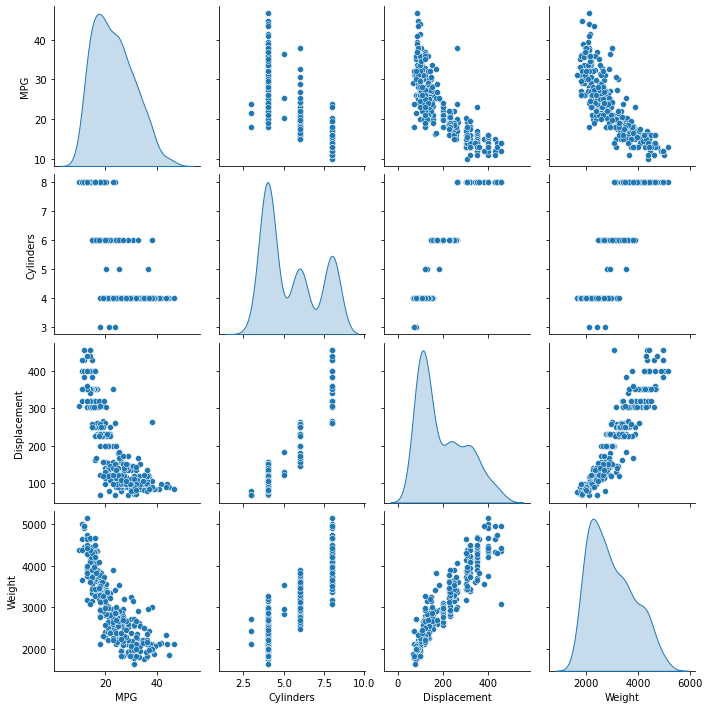

In [6]:
import seaborn as sns
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind="kde")

In [7]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [8]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop("MPG")
test_labels = test_features.pop("MPG")

In [9]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


In [10]:
normalizer = tf.keras.layers.Normalization(axis=-1)     #標準化レイヤー
normalizer.adapt(np.array(train_features))              #平均と分散が計算されレイヤーに保存される
print(normalizer.mean.numpy())

[[5.47770691e+00 1.95318497e+02 1.04869446e+02 2.99025171e+03
  1.55592356e+01 7.58980942e+01 1.78343967e-01 1.97452217e-01
  6.24203861e-01]]


In [11]:
first = np.array(train_features[:1])
with np.printoptions(precision=2, suppress=True):
    print("First example: ", first)
    print("Normalized: ", normalizer(first).numpy())

First example:  [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]
Normalized:  [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


In [15]:
print(np.array(train_features["Horsepower"])[1])

88.0


In [17]:
horsepower = np.array(train_features["Horsepower"])
horsepower_normalizer = tf.keras.layers.Normalization(input_shape=[1,], axis=None)   #層として1つの入力値を持ち、それを正規化する
horsepower_normalizer.adapt(horsepower)

In [18]:
horsepower_model = tf.keras.Sequential([horsepower_normalizer,
                                        tf.keras.layers.Dense(units=1)])

horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [19]:
horsepower_model.predict(horsepower[:10])

1/1 [==============================] - 0s 100ms/step


array([[ 0.5306963 ],
       [ 0.29972273],
       [-0.9795153 ],
       [ 0.7439026 ],
       [ 0.6728338 ],
       [ 0.26418832],
       [ 0.79720414],
       [ 0.6728338 ],
       [ 0.17535236],
       [ 0.29972273]], dtype=float32)

In [21]:
horsepower_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1),       #Adam
                         loss='mean_absolute_error')        #平均絶対誤差

In [33]:
history = horsepower_model.fit(train_features["Horsepower"], train_labels, epochs=100, verbose=0, validation_split=0.2)
#loss: 学習用データを与えたときの損失
#val_loss: 検証用データを与えた時の損失

In [34]:
horsepower_model.save("Datas/Models/Linear_model.h5")

In [28]:
hist = pd.DataFrame(history.history)

[3.802361249923706, 3.804365634918213, 3.805581569671631, 3.8062567710876465, 3.8064730167388916, 3.805055856704712, 3.803987503051758, 3.8048434257507324, 3.80324125289917, 3.8052046298980713, 3.805407762527466, 3.8053765296936035, 3.8055241107940674, 3.805384397506714, 3.802643299102783, 3.803382158279419, 3.8066420555114746, 3.8090219497680664, 3.8079099655151367, 3.8082375526428223, 3.80521559715271, 3.8050761222839355, 3.805778741836548, 3.8027684688568115, 3.811980962753296, 3.808941125869751, 3.80578351020813, 3.8063108921051025, 3.803185224533081, 3.80798077583313, 3.8052635192871094, 3.8043606281280518, 3.8056771755218506, 3.8035130500793457, 3.806467294692993, 3.8059751987457275, 3.8053436279296875, 3.8058438301086426, 3.804861068725586, 3.8067262172698975, 3.8025972843170166, 3.806487798690796, 3.8024675846099854, 3.804079055786133, 3.8071484565734863, 3.802300214767456, 3.80657696723938, 3.8084824085235596, 3.8041446208953857, 3.806696891784668, 3.8019859790802, 3.809222936

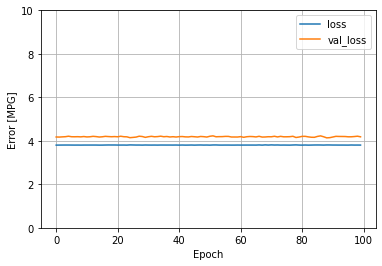

In [36]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.ylim([0, 10])
    plt.xlabel("Epoch")
    plt.ylabel("Error [MPG]")
    plt.legend()
    plt.grid(True)

plot_loss(history)
print(history.history["loss"])
print(history.history["val_loss"])

In [37]:
test_results = {}
test_results["horsepower_model"] = horsepower_model.evaluate(test_features["Horsepower"], test_labels, verbose=0)

In [40]:
x = tf.linspace(0.0, 250, 251)      #(stop - start) / (num - 1)
y = horsepower_model.predict(x)

8/8 [==============================] - 0s 9ms/step


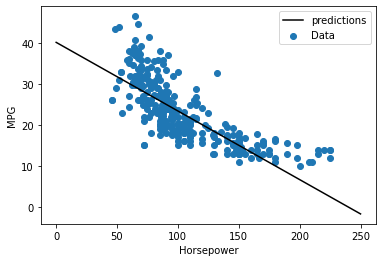

In [41]:
def plot_horsepower(x, y):
    plt.scatter(train_features["Horsepower"], train_labels, label="Data")
    plt.plot(x, y, color="k", label="predictions")
    plt.xlabel("Horsepower")
    plt.ylabel("MPG")
    plt.legend()
plot_horsepower(x, y)

In [42]:
linear_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1)
])

In [43]:
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 273ms/step


array([[-1.3177923 ],
       [-0.81015   ],
       [ 0.86385095],
       [-1.7141755 ],
       [-0.9270859 ],
       [ 0.31174797],
       [-0.77582926],
       [ 2.115351  ],
       [ 0.20267886],
       [-0.29421657]], dtype=float32)

In [50]:
linear_model.layers[1].kernel       #重み行列

<tf.Variable 'dense_1/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[ 0.37293386],
       [ 0.714322  ],
       [-0.21322525],
       [ 0.02094138],
       [ 0.59620523],
       [-0.279517  ],
       [ 0.63111293],
       [-0.08627427],
       [-0.10740501]], dtype=float32)>

In [52]:
linear_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1),
                     loss="mean_absolute_error")

In [53]:
history = linear_model.fit(train_features, train_labels, epochs=100, verbose=0, validation_split=0.2)

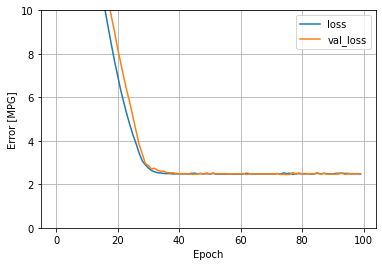

In [54]:
plot_loss(history)

In [60]:
test_results["linear_model"] = linear_model.evaluate(test_features, test_labels, verbose=0)

In [61]:
def build_and_compile_model(normal):
    model = tf.keras.Sequential([
        normal,
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(1)
    ])

    model.compile(loss="mean_absolute_error", optimizer=tf.keras.optimizers.Adam(0.001))
    return model

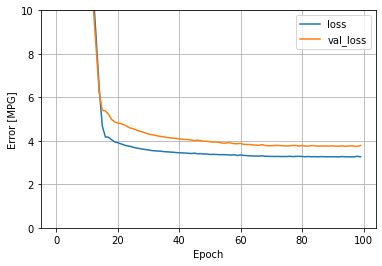

In [62]:
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)   #単一モデル
history = dnn_horsepower_model.fit(train_features["Horsepower"], train_labels, validation_split=0.2, verbose=0, epochs=100)
plot_loss(history)

8/8 [==============================] - 1s 5ms/step


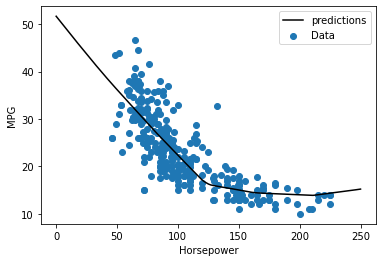

In [64]:
x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)
plot_horsepower(x, y)

In [66]:
test_results["dnn_horsepower_model"] = dnn_horsepower_model.evaluate(test_features["Horsepower"], test_labels, verbose=0)

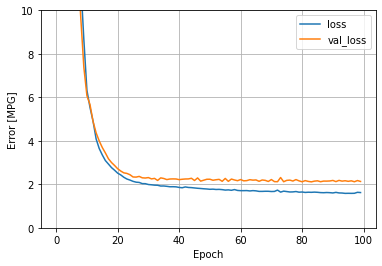

In [68]:
dnn_model = build_and_compile_model(normalizer)
history = dnn_model.fit(train_features, train_labels, validation_split=0.2, verbose=0, epochs=100)
plot_loss(history)

In [69]:
test_results["dnn_model"] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [71]:
pd.DataFrame(test_results, index=["mean absolute error [MPG]"]).T

,mean absolute error [MPG]
horsepower_model,3.638876
linear_model,2.480811
dnn_horsepower_model,2.906509
dnn_model,1.683245


In [ ]:
dnn_model.save("./Datas/Models/DNN_Linear_model.h5")